In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA


In [17]:
# Cargar dataset Iris
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Convertir a DataFrame
df = pd.DataFrame(X, columns=iris.feature_names)
df["species"] = y

# Ver primeras filas
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


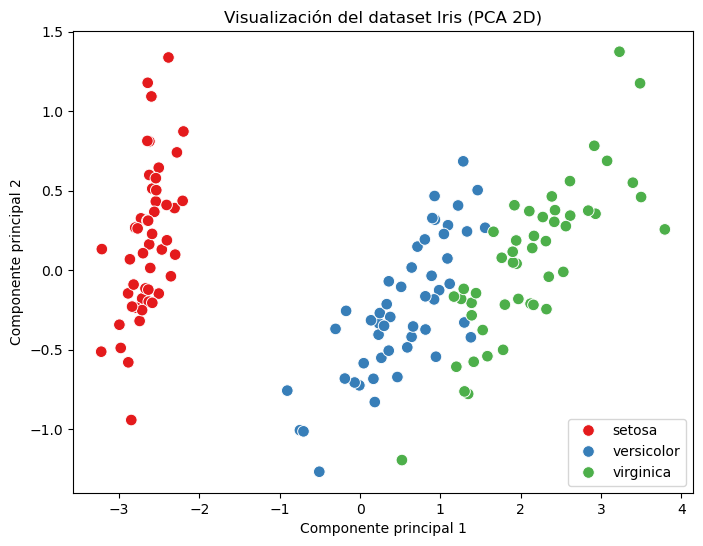

In [18]:
# Usamos PCA para reducir a 2D y graficar
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=[target_names[i] for i in y], palette="Set1", s=70)
plt.title("Visualización del dataset Iris (PCA 2D)")
plt.legend()
plt.show()


In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)



In [20]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)



Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


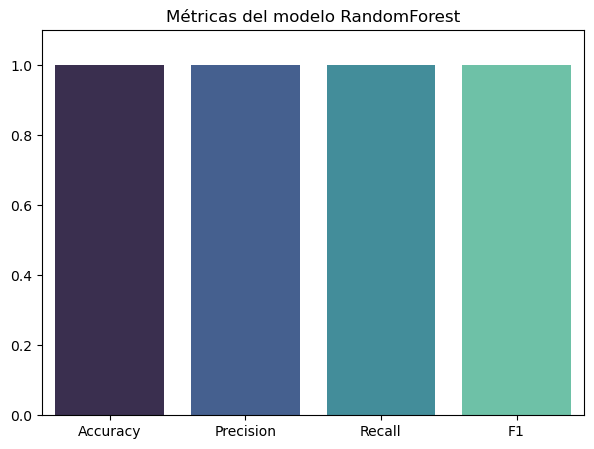

In [21]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Cálculo de métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="macro")
recall = recall_score(y_test, y_pred, average="macro")
f1 = f1_score(y_test, y_pred, average="macro")

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Gráfica de métricas
metrics = {"Accuracy": accuracy, "Precision": precision, "Recall": recall, "F1": f1}
plt.figure(figsize=(7,5))
sns.barplot(
    x=list(metrics.keys()), 
    y=list(metrics.values()), 
    hue=list(metrics.keys()),  # ahora se usa hue
    palette="mako", 
    legend=False               # desactiva la leyenda duplicada
)
plt.ylim(0,1.1)
plt.title("Métricas del modelo RandomForest")
plt.show()


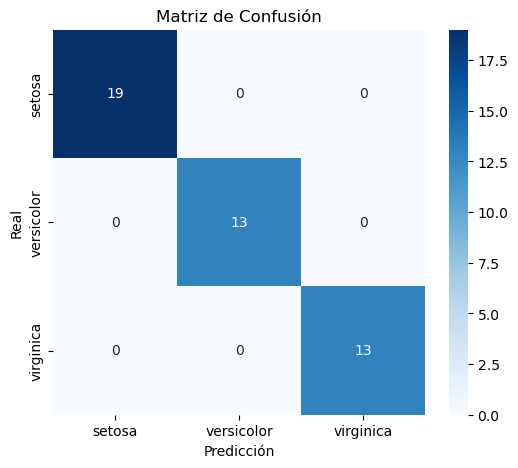

In [22]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()



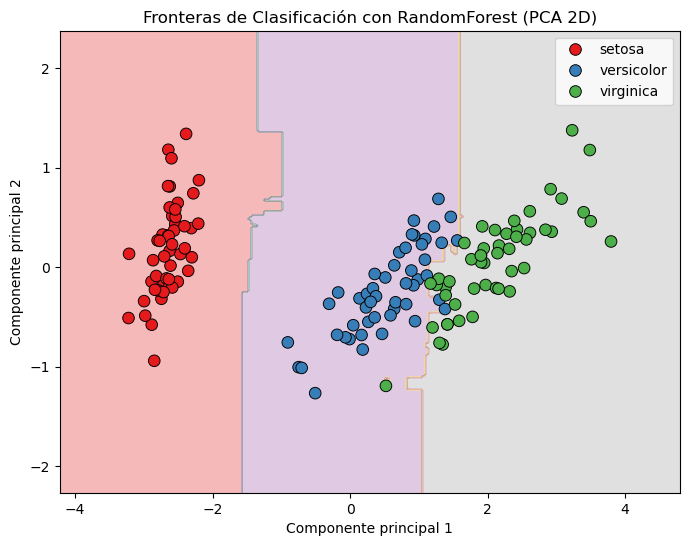

In [23]:
import numpy as np

# Reducimos a 2D para graficar fronteras
X_reduced = pca.transform(X)

# Entrenamos un clasificador en el espacio reducido
rf_2d = RandomForestClassifier(n_estimators=100, random_state=42)
rf_2d.fit(X_reduced, y)

# Crear malla para graficar fronteras
x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

Z = rf_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Graficar fronteras y puntos reales
plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap="Set1")
sns.scatterplot(x=X_reduced[:,0], y=X_reduced[:,1], hue=[target_names[i] for i in y],
                palette="Set1", s=70, edgecolor="k")
plt.title("Fronteras de Clasificación con RandomForest (PCA 2D)")
plt.legend()
plt.show()
